# Part 1 - Question Answering

For the first part, use the Hugging Face question-answering pipeline and feed it with the five 300-word long sections from the book of your choice that you analyzed in Project 1.

These sections should be selected so they are: introducing the protagonist(s), the antagonist, the crime and crime scene, any significant evidence, and the resolution of the crime/a narrative that presents the case against the perpetrator.

For a prompt, Implement a simple prompt interface that takes in your question, runs it against the model, and returns the answer. You don't need to do anything special about this, just a simple console I/O interface without any complicated error handling. It is up to you how you want to upload the context to the model (pre-loaded into your program, on-demand, etc.).

The questions you should ask are about the identity and characteristics of the protagonist, antagonist/perpetrator, the nature and the setting of the crime or crime scene, the evidence, and the case against the perpetrator.

Document the questions, ask the questions, and document the specificity and accuracy of the results.

Part 1.2 - use two different HF QA models: use the default question-answering pipeline, then use other models of choice and discuss the differences in the result.

https://huggingface.co/docs/transformers/main_classes/pipelines

https://huggingface.co/docs/transformers/v4.35.0/en/main_classes/pipelines#transformers.QuestionAnsweringPipeline


In [21]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
from collections import defaultdict
from matplotlib import pyplot as plt


from src.utils import read_context, read_qa
from src.question_answering import run, run_models


---
---

## Experiments & Results

For the first part, use the Hugging Face question-answering pipeline and feed it with the five 300-word long sections from the book of your choice that you analyzed in Project 1.

These sections should be selected so they are: **introducing the protagonist(s), the antagonist, the crime and crime scene, any significant evidence, and the resolution of the crime/a narrative that presents the case against the perpetrator.**

The questions you should ask are about the identity and characteristics of the protagonist, antagonist/perpetrator, the nature and the setting of the crime or crime scene, the evidence, and the case against the perpetrator.

Document the questions, ask the questions, and document the specificity and accuracy of the results.


In [23]:
# TODO: Try out a good selection of models and keep some interesting ones
models = [
    "distilbert-base-uncased-distilled-squad",
    "deepset/roberta-base-squad2",
]


Found: ['protagonist.0.md', 'protagonist.qa.md']
################################################################################
################################################################################
Sherlock Holmes took his bottle from the corner of the mantel-piece and his hypodermic syringe from its neat morocco case. With his long, white, nervous fingers he adjusted the delicate needle, and rolled back his left shirt-cuff. For some little time his eyes rested thoughtfully upon the sinewy forearm and wrist all dotted and scarred with innumerable puncture-marks. Finally he thrust the sharp point home, pressed down the tiny piston, and sank back into the velvet-lined arm-chair with a long sigh of satisfaction. Three times a day for many months I had witnessed this performance, but custom had not reconciled my mind to it. On the contrary, from day to day I had become more irritable at the sight, and my conscience swelled nightly within me at the thought that I had lacked the

Q: Who is the main character that the story revolves around?
A: the Beaune (confidence: 0.588)
SIMILARITY: 0.04371797867560982
--------------------------------------------------------------------------------
Q: Who is the main character that the story revolves around?
A: cocaine (confidence: 0.153)
SIMILARITY: 0.045664082271770025
Current Question: Who is the detective in the story?
Expected Answer: Sherlock Holmes
--------------------------------------------------------------------------------
Q: Who is the detective in the story?
A: Sherlock Holmes (confidence: 0.866)
SIMILARITY: 1.0
--------------------------------------------------------------------------------
Q: Who is the detective in the story?
A: Sherlock Holmes (confidence: 0.478)
SIMILARITY: 1.0
Current Question: Who is the main protagonist in the story?
Expected Answer: Sherlock Holmes
--------------------------------------------------------------------------------
Q: Who is the main protagonist in the story?
A: Sherlock Ho

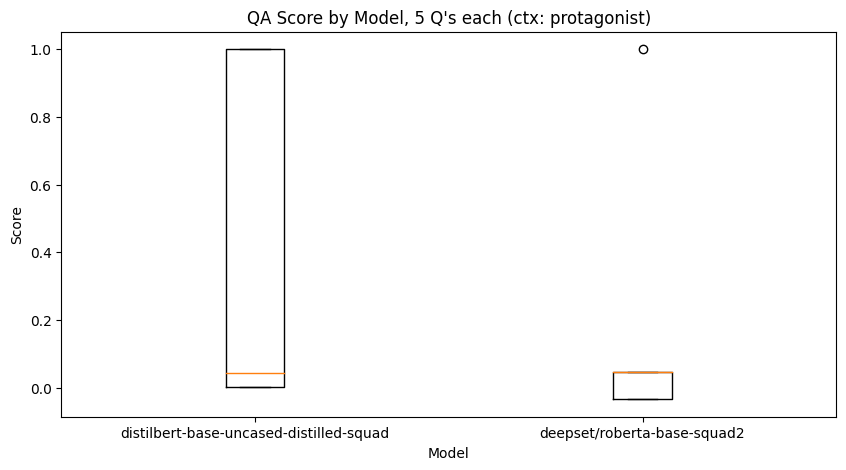

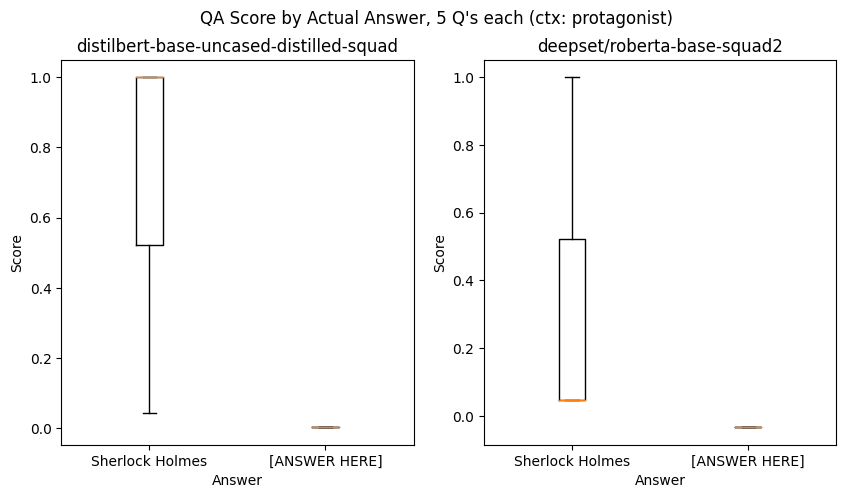

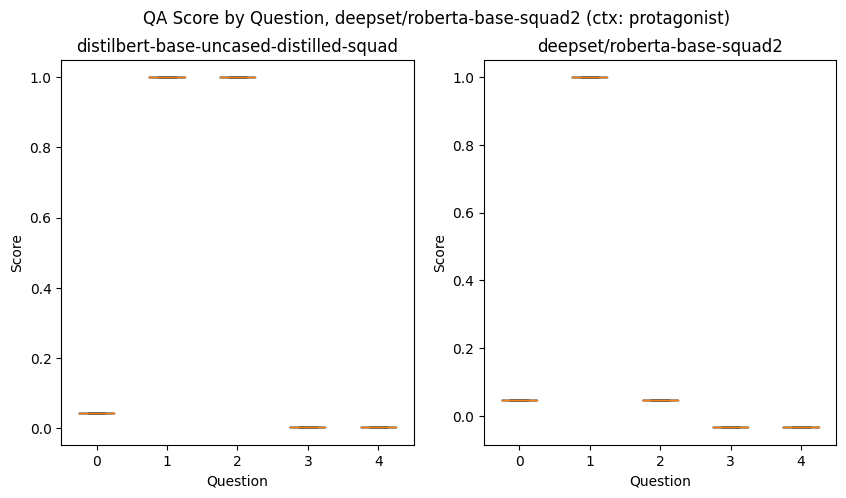

In [24]:
ctx_name = "protagonist"

for i, (fname, ctx) in enumerate(read_context(ctx_name)):
    print("#" * 80)
    print("#" * 80)
    print(ctx)

    scores_by_question = {m: defaultdict(list) for m in models}
    scores_by_answer = {m: defaultdict(list) for m in models}
    scores_by_model = defaultdict(list)

    for j, (question, true_answer) in enumerate(read_qa(ctx_name)):
        print("=" * 80)
        print("=" * 80)
        print(f"Current Question: {question}")
        print(f"Expected Answer: {true_answer}")

        _, scores = run_models(
            question,
            ctx,
            models,
            expected_answer=true_answer,
        )

        for m, s in zip(models, scores):
            scores_by_model[m].append(s)
            scores_by_answer[m][true_answer].append(s)
            scores_by_question[m][j].append(s)


    # scores_by_model
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.boxplot(scores_by_model.values())
    ax.set_xticklabels(scores_by_model.keys())
    ax.set_title(f"QA Score by Model, {j+1} Q's each (ctx: {ctx_name})")
    ax.set_ylabel("Score")
    ax.set_xlabel("Model")
    plt.show()

    # scores_by_answer
    fig = plt.figure(figsize=(10, 5))
    for i, m in enumerate(models):
        ax = fig.add_subplot(1, len(models), i + 1)
        ax.boxplot(scores_by_answer[m].values())
        ax.set_xticklabels(scores_by_answer[m].keys())
        ax.set_title(m)
        ax.set_ylabel("Score")
        ax.set_xlabel("Answer")

    fig.suptitle(f"QA Score by Actual Answer, {j+1} Q's each (ctx: {ctx_name})")
    plt.show()

    # scores_by_question
    fig = plt.figure(figsize=(10, 5))
    for i, m in enumerate(models):
        ax = fig.add_subplot(1, len(models), i + 1)
        ax.boxplot(scores_by_question[m].values())
        ax.set_xticklabels(scores_by_question[m].keys())
        ax.set_title(m)
        ax.set_ylabel("Score")
        ax.set_xlabel("Question")

    fig.suptitle(f"QA Score by Question, {m} (ctx: {ctx_name})")
    plt.show()

    print()
